# Frequency Responses Convertor

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pathfinder import Pathfinder

relative_paths = [['..', '..', '..', '..', '..', '..', '資料科學', 'Allen Downey', 'Think DSP', 'code'],
                  ['..', '..', '..', '..', 'AutoEq'],
                  ['..', 'codes']]

Pathfinder.append_relative_paths(relative_paths)

import pandas as pd

# from drc.sound import Sound
from drc.tuners.response.equalizer import ResponseEqualizer
# from drc.measurements import Sampler
from drc.measurements.frequency.responses import FrequencyResponse
from drc.filters.peq import PEQs

In [3]:
# FrequencyResponse.FREQUENCY_TO_CENTER = 1000
FrequencyResponse.FREQUENCY_TO_CENTER = [100, 8000]

# Read frequency response from csv file

In [4]:
# model_from_name = 'KZ_EDR1'
# model_from_name = 'QCY_QS2'
# model_from_name = 'Mi_NDZ_03_GB'
# model_from_name = 'NB speaker'
# model_from_name = 'BeatsPro'
# model_from_name = 'Racoon speakers'
model_from_name = 'JamBox'


fn_measurement_from = f'c:\\Users\\Wei\\Desktop\\REW data\\{model_from_name} measurement.txt'
fr_measurement_from = FrequencyResponse.read_from_csv(fn_measurement_from)

# Read frequency response from the Web
https://github.com/jaakkopasanen/AutoEq/tree/master/results  
https://github.com/jaakkopasanen/AutoEq/tree/master/measurements

In [5]:
model_from_name = 'Audeze LCD-X'
url_measurement_from = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Audeze%20LCD-X/Audeze%20LCD-X.csv'

model_from_name = 'Beats Pro'
url_measurement_from = 'https://github.com/jaakkopasanen/AutoEq/raw/c352d1c1223b79f1daa7ab03b0a51cda86c33794/measurements/oratory1990/data/onear/Beats%20Pro/Beats%20Pro.csv'

# model_from_name = 'AKG K371'
# url_measurement_from = 'https://github.com/jaakkopasanen/AutoEq/raw/c352d1c1223b79f1daa7ab03b0a51cda86c33794/results/oratory1990/harman_over-ear_2018/AKG%20K371/AKG%20K371.csv'

# model_from_name = 'Sennheiser HD650'
# url_measurement_from = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Sennheiser%20HD%20650/Sennheiser%20HD%20650.csv'

# model_from_name = 'Sennheiser HD600'
# url_measurement_from = 'https://github.com/jaakkopasanen/AutoEq/raw/c352d1c1223b79f1daa7ab03b0a51cda86c33794/results/oratory1990/harman_over-ear_2018/Sennheiser%20HD%20600/Sennheiser%20HD%20600.csv'

# model_from_name = 'Sennheiser HD560S'
# url_measurement_from = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Sennheiser%20HD%20560S/Sennheiser%20HD%20560S.csv'

# model_from_name = 'Sennheiser HD6XX'
# url_measurement_from = 'https://github.com/jaakkopasanen/AutoEq/raw/89fd05b88f74307f68b8673563c07c5fcfdf3e73/results/rtings/rtings_harman_over-ear_2018/Sennheiser%20HD%206XX/Sennheiser%20HD%206XX.csv'

# model_from_name = 'AKG K701'
# url_measurement_from = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/89fd05b88f74307f68b8673563c07c5fcfdf3e73/results/rtings/rtings_harman_over-ear_2018/AKG%20K701/AKG%20K701.csv'

# model_from_name = 'Beyerdynamic DT880'
# url_measurement_from = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/c352d1c1223b79f1daa7ab03b0a51cda86c33794/measurements/oratory1990/data/onear/Beyerdynamic%20DT%20880%20250%20Ohm/Beyerdynamic%20DT%20880%20250%20Ohm.csv'

# model_from_name = 'AKG N400'
# url_measurement_from = 'https://github.com/jaakkopasanen/AutoEq/raw/master/results/oratory1990/harman_in-ear_2019v2/AKG%20N400/AKG%20N400.csv'

# model_from_name = 'PSB M4U 8'
# url_measurement_from = 'https://github.com/jaakkopasanen/AutoEq/raw/master/results/oratory1990/harman_over-ear_2018/PSB%20M4U%208/PSB%20M4U%208.csv'

# model_from_name = 'Sony MDR-7506'
# url_measurement_from = 'https://github.com/jaakkopasanen/AutoEq/raw/89fd05b88f74307f68b8673563c07c5fcfdf3e73/results/oratory1990/harman_over-ear_2018/Sony%20MDR-7506/Sony%20MDR-7506.csv'


fr_measurement_from = FrequencyResponse.read_csv_from_url(url_measurement_from)
fr_measurement_from.name = model_from_name

# Compensation from csv file

In [6]:
# model_to_name = 'flat'
# fn_measurement_to = 'compensation/zero.csv'

model_to_name = 'harman_over-ear_2013'
fn_measurement_to = 'compensation/harman_over-ear_2013.csv'

model_to_name = 'harman_over-ear_2018'
fn_measurement_to = 'compensation/harman_over-ear_2018.csv'

fr_measurement_to = FrequencyResponse.read_from_csv(fn_measurement_to)

# Compensation from the Web

In [7]:
model_to_name = 'Sennheiser HD560S'
url_measurement_to = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Sennheiser%20HD%20560S/Sennheiser%20HD%20560S.csv'

fr_measurement_to = FrequencyResponse.read_csv_from_url(url_measurement_to)

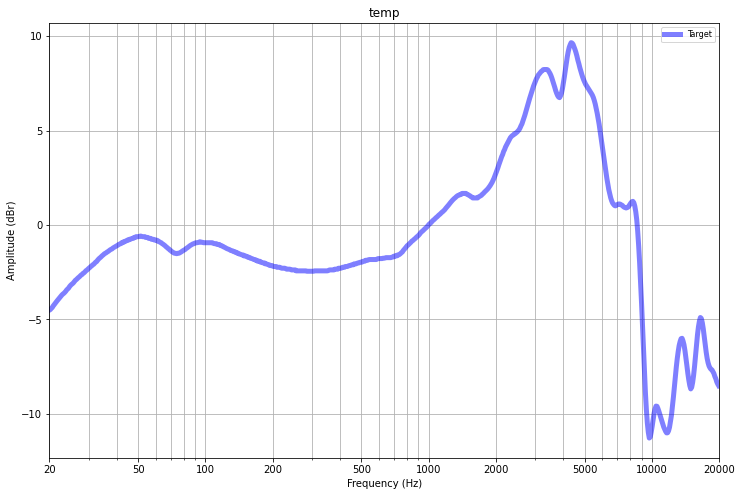

In [8]:
fr_measurement_to.plot_graph(raw_plot_kwargs = dict(label = 'Target', linewidth = 5, color = 'blue', alpha = 0.5));

# Calculate PEQ coefficients 

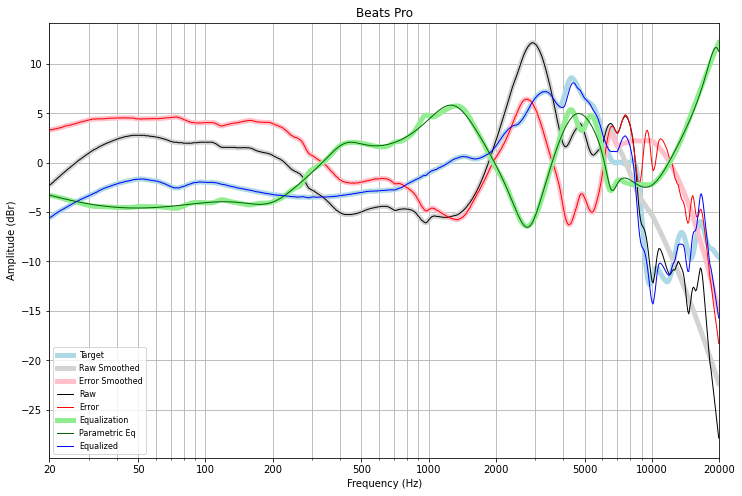

In [9]:
import time


n_filters = 10
max_gain_dB = 12
bass_boost_gain = 0

measurement, peqs, n_peq_filters, peq_max_gains = \
    ResponseEqualizer.get_peq_filters(measurement = fr_measurement_from,
                                      compensation = fr_measurement_to,
                                      max_filters = n_filters,
                                      max_gain_dB = max_gain_dB,
                                      bass_boost_gain = bass_boost_gain) 

# measurement.write_to_csv(f'results/{model_from_name} to {model_to_name} measurement.csv')
measurement.plot_graph();

In [10]:
fn_filter_settings = f'results/{model_from_name} to {model_to_name} PEQ filters.txt'
peqs.dump(fn_filter_settings)

fn_filter_settings

'results/Beats Pro to Sennheiser HD560S PEQ filters.txt'

# PEQ settings

In [11]:
peqs = PEQs()

peqs.load(fn_filter_settings) 
print(f'{model_from_name} to {model_to_name} PEQ filters:')
print(pd.DataFrame(peqs.param_sets))
print()    

Beats Pro to Sennheiser HD560S PEQ filters:
  type  freq_Hz  gain_dB      Q
0   PK     46.1   -4.474  0.323
1   PK    197.6   -2.745  1.156
2   PK    422.4    2.472  1.752
3   PK   1292.0    6.648  1.179
4   PK   2803.6  -11.029  1.671
5   PK   4563.0    8.382  1.150
6   PK   6587.8   -4.353  5.010
7   PK   9542.6   -5.378  1.050
8   PK  19373.4   11.888  0.614

